# Notebook 8 - Dark Energy Toy Model (Reeb Flow)

**Level:** Intermediate  
**Topics:** Reeb flow, resonance density xi, prime sets, dark energy vs matter

> **Provenance:** This notebook is based on:
> - `examples/reeb_flow.py`
> - `light_theory_realm/pocket_u_lite` Reeb utilities


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from light_theory_realm.engine import CliffordEngine
from light_theory_realm.experiments.prime_gauge.reeb_flow import ReebFlowDynamics

plt.rcParams["figure.figsize"] = (7, 5)

engine = CliffordEngine(seed=42)
reeb = ReebFlowDynamics(engine)

PRIME_CASES = {
    "Matter": [2, 3, 5, 7],
    "Intermediate": [11, 13, 17, 19],
    "Vacuum": [17, 41, 73, 89],
}

def run_reeb_case(primes):
    primes = tuple(primes)
    xi = float(reeb.compute_resonance_density(primes))
    return {"xi": xi, "primes": primes}


W1202 16:46:58.217205  119218 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W1202 16:46:58.229022  119106 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


## 1. Three prime regimes: matter, intermediate, vacuum

We will run three representative prime sets:

- Matter-like: small or low primes
- Intermediate: mixed primes
- Vacuum-like: large or high primes

Each returns a resonance density xi.


In [2]:
cases = list(PRIME_CASES.items())
rows = []
for label, primes in cases:
    result = run_reeb_case(primes)
    rows.append({"label": label, "case": label.lower(), "xi": result["xi"], "primes": primes})

df_reeb = pd.DataFrame(rows)
df_reeb


label          case        xi            primes
0        Matter        matter  0.142857      [2, 3, 5, 7]
1  Intermediate  intermediate  0.125000  [11, 13, 17, 19]
2        Vacuum        vacuum  1.000000  [17, 41, 73, 89]

## 2. xi by regime


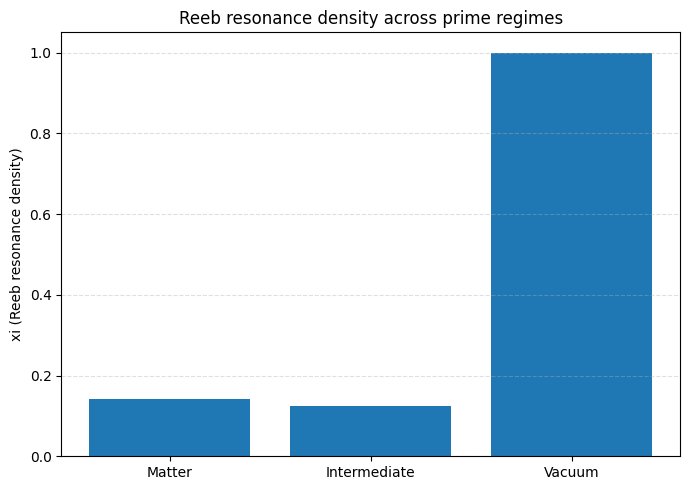

In [3]:
plt.figure()
plt.bar(df_reeb["label"], df_reeb["xi"])
plt.ylabel("xi (Reeb resonance density)")
plt.title("Reeb resonance density across prime regimes")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


## 3. Vacuum versus matter ratio

A simple toy proxy for the dark-energy fraction is the ratio xi_vacuum / xi_matter.


In [4]:
xi_matter = float(df_reeb.loc[df_reeb["label"] == "Matter", "xi"].iloc[0])
xi_vacuum = float(df_reeb.loc[df_reeb["label"] == "Vacuum", "xi"].iloc[0])

ratio = xi_vacuum / xi_matter if xi_matter != 0 else float("inf")
print(f"xi_vacuum = {xi_vacuum:.6e}")
print(f"xi_matter = {xi_matter:.6e}")
print(f"Vacuum / Matter xi ratio ≈ {ratio:.3e}")


xi_vacuum = 1.000000e+00
xi_matter = 1.428571e-01
Vacuum / Matter xi ratio ≈ 7.000e+00


## 4. User-defined prime sets

You can plug in your own prime lists to explore how xi behaves.


In [5]:
def run_custom_primes(prime_list):
    """
    Thin wrapper around the Reeb machinery to run custom primes.
    """
    return run_reeb_case(prime_list)

# Example custom run (edit the primes)
custom_primes = [2, 3, 5, 7, 11, 13]
# Uncomment to try:
# custom_result = run_custom_primes(custom_primes)
# custom_result


## 5. Interpretation and next steps

Questions to explore:

- How does xi grow as you move from small to large primes?
- Does the vacuum to matter xi ratio land near cosmological observations (very loosely)?
- How robust is the ratio to small changes in the prime sets?

Next notebooks:

- Notebook 9 - U(1) Clock Playground
- Notebook 10 - Quantum QHBM / VQT Tutorial
